# Laboratorio 5

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.models import Sequential

## Análisis Exploratorio

In [37]:
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255
X_train.shape

(60000, 28, 28)

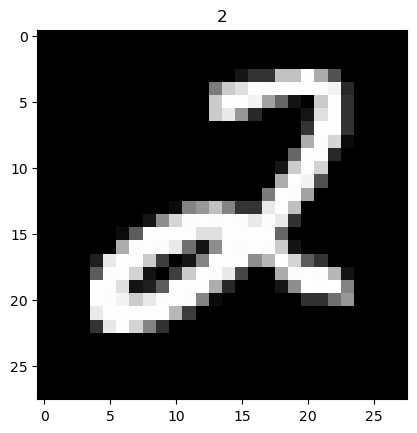

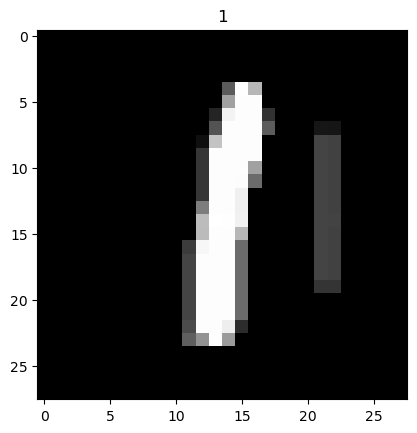

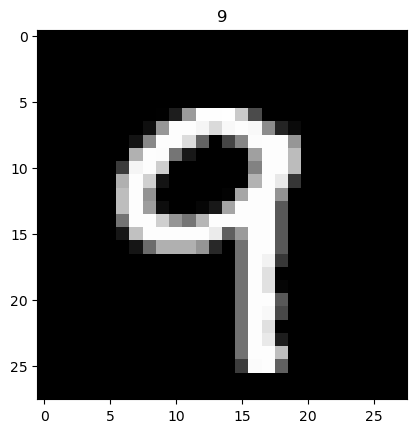

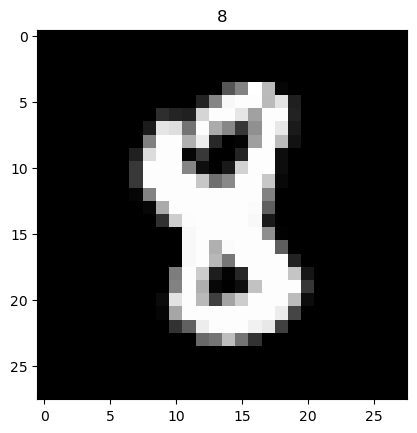

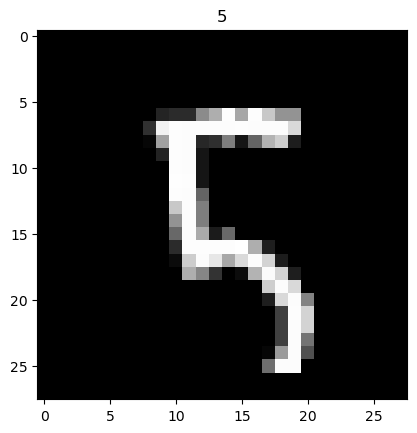

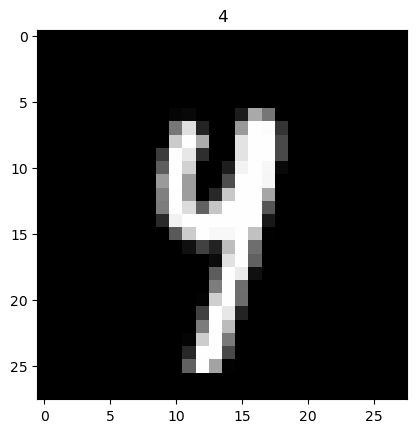

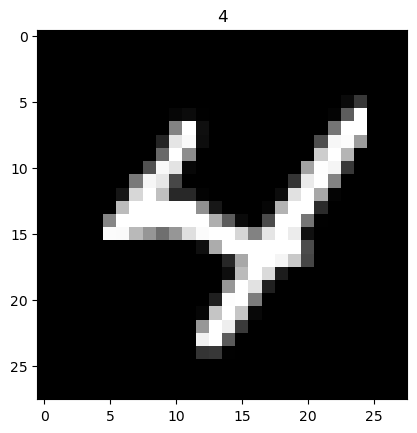

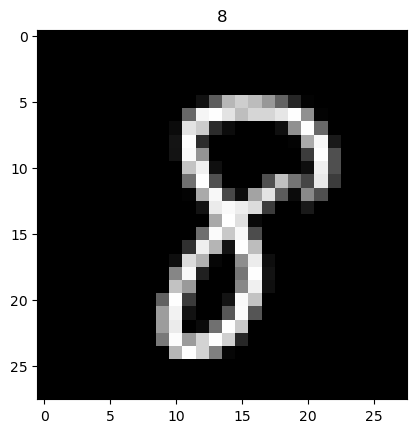

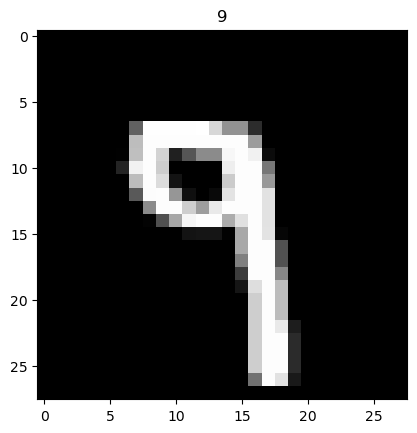

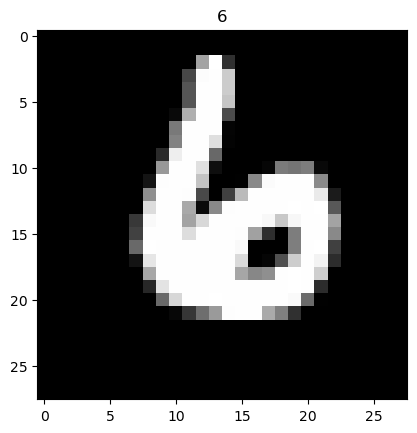

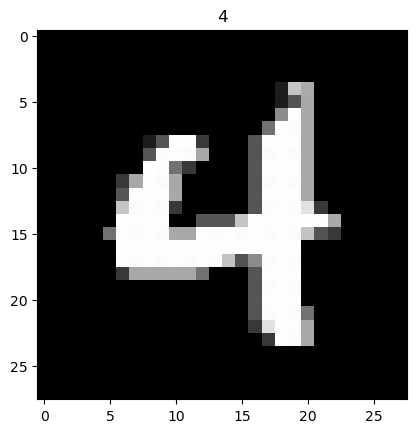

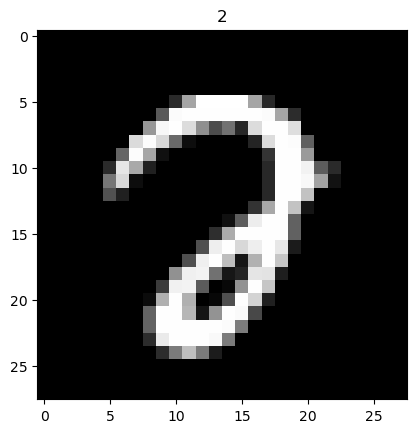

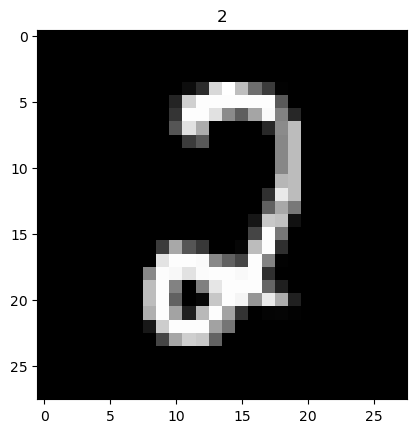

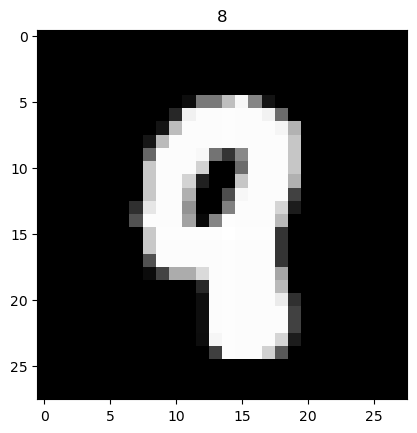

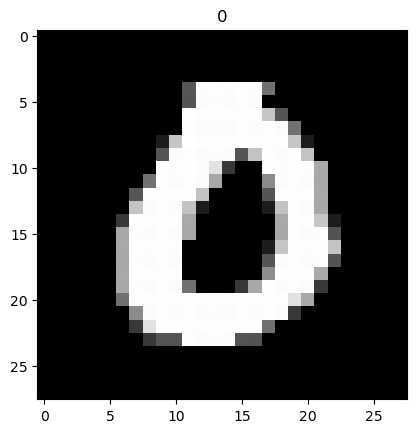

In [24]:
X_train = df.drop('label', axis=1)

for i in range(15):
    im = np.random.randint(0, len(df)-1)
    plt.imshow(X_train.loc[im, :].values.reshape((28, 28)), cmap='gray')
    plt.title(y[im])
    plt.show()

## Entrenmiento

In [25]:
generator = Sequential([
    Dense(128, input_shape=(100,), activation='relu'),
    Dense(784, activation='sigmoid'),
    Reshape((28, 28))
])

In [26]:
discriminator = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

In [27]:
gan = Sequential([generator, discriminator])
gan.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Función para entrenar la GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        num_batches = X_train.shape[0] // batch_size
        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size
            real_images = X_train[start_idx:end_idx]
            
            noise = np.random.randn(batch_size, 100)
            generated_images = generator.predict(noise)
            
            # Entrenar el discriminador
            d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            # Entrenar la GAN (generador)
            noise = np.random.randn(batch_size, 100)
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        
        print(f"Epoch {epoch + 1}, D Loss: {d_loss[0]}, G Loss: {g_loss[0]}")
        if (epoch + 1) % 10 == 0:
            generate_and_save_images(generator, epoch + 1)

In [35]:
def generate_and_save_images(model, epoch, test_input=np.random.randn(16, 100)):
    generated_images = model.predict(test_input)
    generated_images = 0.5 * generated_images + 0.5  # Escalar las imágenes al rango [0, 1]
    fig, axes = plt.subplots(4, 4, figsize=(4, 4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(generated_images[i], cmap='gray')
        ax.axis('off')
    plt.savefig(f'gan_generated_image_epoch_{epoch}.png')
    plt.show()

In [36]:
train_gan(epochs=100, batch_size=64)

2/2 [==============================] - 0s 4ms/step


ValueError: in user code:

    File "C:\Users\osjom\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\osjom\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\osjom\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\osjom\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\osjom\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\osjom\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(64, 784)


## Resultados